# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from api_keys import api_key
# Import API key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### API Calls

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
record = 0
sets = 1
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
not_found_countries = []


for x in cities:
    print(f'Processing Record {record} of Set {sets} | {x}')
    try:
        query_url = url + "appid=" + api_key + "&q=" + x
        weather_response = requests.get(query_url).json()
        cloudiness.append(weather_response['clouds']['all'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        humidity.append(weather_response['main']['humidity'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        wind_speed.append(weather_response['wind']['speed'])
        
    except:
        print('City not found. Skipping...')
        not_found_countries.append(x)
    
    if record == 49:
        record = 0
        sets = sets + 1
    else:
        record = record + 1
    
    

Processing Record 0 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | clyde river
Processing Record 4 of Set 1 | camacha
Processing Record 5 of Set 1 | kaeo
Processing Record 6 of Set 1 | airai
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | molina
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | byron bay
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | tilichiki
Processing Record 16 of Set 1 | husavik
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | itamaraca
Processing Record 19 of Set 1 | lasa
Processing Record 20 of Set 1 | sawtell
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | san quintin
Processing Record 23 of Set 1 | carnarvon
P

Processing Record 38 of Set 4 | bathsheba
Processing Record 39 of Set 4 | bandarbeyla
Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 42 of Set 4 | waverley
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | lobito
Processing Record 45 of Set 4 | mehamn
Processing Record 46 of Set 4 | sorokino
Processing Record 47 of Set 4 | kuche
City not found. Skipping...
Processing Record 48 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 49 of Set 4 | nioki
Processing Record 0 of Set 5 | kazalinsk
City not found. Skipping...
Processing Record 1 of Set 5 | dvinskoy
Processing Record 2 of Set 5 | manuk mangkaw
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | passo de camaragibe
Processing Record 5 of Set 5 | belyy yar
Processing Record 6 of Set 5 | tautira
Processing Record 7 of Set 5 | olafsvik
City not found. Skipping...
Process

Processing Record 24 of Set 8 | camabatela
Processing Record 25 of Set 8 | ushtobe
Processing Record 26 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 27 of Set 8 | axim
Processing Record 28 of Set 8 | goure
Processing Record 29 of Set 8 | solnechnyy
Processing Record 30 of Set 8 | prata
Processing Record 31 of Set 8 | paamiut
Processing Record 32 of Set 8 | tawau
Processing Record 33 of Set 8 | silver city
Processing Record 34 of Set 8 | lebanon
Processing Record 35 of Set 8 | tessalit
Processing Record 36 of Set 8 | klaksvik
Processing Record 37 of Set 8 | egvekinot
Processing Record 38 of Set 8 | port macquarie
Processing Record 39 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 40 of Set 8 | surt
Processing Record 41 of Set 8 | jiayuguan
Processing Record 42 of Set 8 | mudanjiang
Processing Record 43 of Set 8 | srednekolymsk
Processing Record 44 of Set 8 | samusu
City not found. Skipping...
Processing Record 45 of Set 8 | spornoye
Proc

Processing Record 9 of Set 12 | north bend
Processing Record 10 of Set 12 | iskateley
Processing Record 11 of Set 12 | snezhnogorsk
Processing Record 12 of Set 12 | mitchell
Processing Record 13 of Set 12 | banjar
Processing Record 14 of Set 12 | krasnoarmeyskiy
Processing Record 15 of Set 12 | baoding
Processing Record 16 of Set 12 | lacolle
Processing Record 17 of Set 12 | port-cartier
Processing Record 18 of Set 12 | virginia beach
Processing Record 19 of Set 12 | harnosand
Processing Record 20 of Set 12 | utiroa
City not found. Skipping...
Processing Record 21 of Set 12 | burns lake
Processing Record 22 of Set 12 | lalganj
Processing Record 23 of Set 12 | shelburne
Processing Record 24 of Set 12 | bureya
Processing Record 25 of Set 12 | itaituba
Processing Record 26 of Set 12 | guimar
City not found. Skipping...
Processing Record 27 of Set 12 | road town
Processing Record 28 of Set 12 | porto velho
Processing Record 29 of Set 12 | jepara
Processing Record 30 of Set 12 | severo-kuri

In [5]:
#remove not found cities 
cities_clean = []

for x in cities:
    if x not in not_found_countries:
        cities_clean.append(x)


In [6]:
#dictionary
df = {'City':cities_clean,'Cloudiness':cloudiness,'Country':country,'Date':date,'Humidity':humidity,'Lat':lat,'Lng':lng,
     'Max Temp':max_temp,'Wind Speed':wind_speed}
#DataFrame
master = pd.DataFrame(df)
master.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hilo,75,US,1554164119,61,19.71,-155.08,300.15,3.60
1,vardo,1,US,1554164045,35,39.62,-77.74,280.15,1.50
2,clyde river,90,CA,1554162660,77,70.47,-68.59,254.15,6.20
3,camacha,20,PT,1554163200,63,33.08,-16.33,289.15,1.00
4,kaeo,20,NZ,1554163684,80,-35.10,173.78,292.59,2.68


In [14]:
#(x °F − 32) × 5/9
master['Max Temp C°'] = (master['Max Temp'] - 32) * (5/9)


In [23]:
#Quitar un outliers
master = master.loc[master['Humidity'] <= 100,:]

In [29]:
master.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

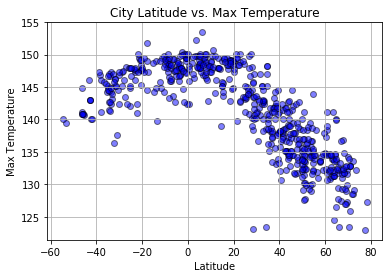

In [24]:
plt.scatter(master['Lat'],master['Max Temp C°'],c='blue',alpha=0.5,edgecolors='black')
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
plt.savefig("Images/Latitude vs. Temperature Plot.png")
plt.show()

#### Latitude vs. Humidity Plot

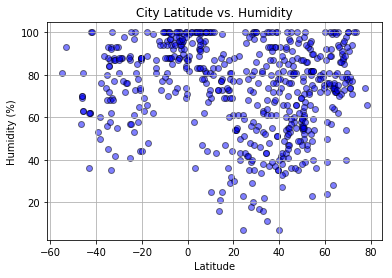

In [25]:
plt.scatter(master['Lat'],master['Humidity'],c='blue',alpha=0.5,edgecolors='black')
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Images/Latitude vs. Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

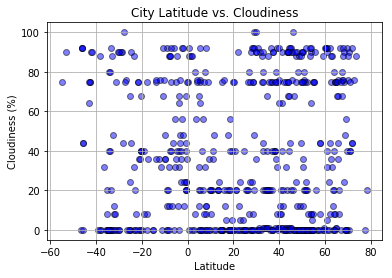

In [26]:
plt.scatter(master['Lat'],master['Cloudiness'],c='blue',alpha=0.5,edgecolors='black')
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Images/Latitude vs. Cloudiness Plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

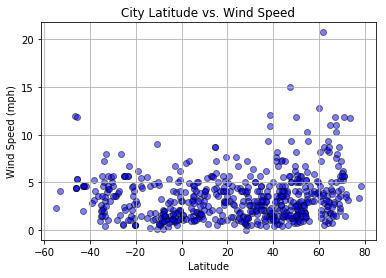

In [27]:
plt.scatter(master['Lat'],master['Wind Speed'],c='blue',alpha=0.5,edgecolors='black')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Images/Latitude vs. Wind Speed Plot.png")
plt.show()